# Assignment 6

## 1. Use the Taylor series and derive polynomial for $\sin{2x}$ !

$$
\sin{2x} = ...............
$$

#### The Taylor Series of Derive Polynomial is 
$$f(x) = f(0) + f'(0) \cdot x + \frac{f''(0)\cdot x^2}{2!}+\frac{f'''(0)\cdot x^3}{3!}+ \cdots $$

#### The Derivative of Sin(2x) is 

Even Number of Derevative : $(-1)^{\lfloor\frac{n}{2}\rfloor}\cdot2^n\cdot\sin{2x}$

Odds Number of Derevative : $(-1)^{\lfloor\frac{n}{2}\rfloor}\cdot2^n\cdot\cos{2x}$

*Where n is the number of derivative*

#### The Taylor Series of Derive Polynomial of $\sin{2x}$
$$\sin{2x} = f(0) + f'(0) \cdot x + \frac{f''(0)\cdot x^2}{2!}+\frac{f'''(0)\cdot x^3}{3!}+ \cdots $$

#### Derevative Result
###### The Function $\sin{2x}$ = $0$
###### 1st Differential $(-1)^02^1\cos{2x}$ : $2\cos{2x}$ = $2$
###### 2nd Differential $(-1)^02^2\sin{2x}$ : $-4\sin{2x}$ = $0$
###### 3rd Differential $(-1)^12^3\cos{2x}$ : $-8\cos{2x}$ = $-8$

#### The Taylor Series of Derive Polynomial of $\sin{2x}$
$$\sin{2x} = 0 + 2 \cdot x + \frac{0\cdot x^2}{2!}+\frac{-8\cdot x^3}{3!}+\frac{0\cdot x^4}{4!}+ \frac{32\cdot x^5}{5!}+ \cdots $$
$$\sin{2x} = 2 \cdot x + \frac{-8\cdot x^3}{3!}+ \frac{32\cdot x^5}{5!}+ \frac{-128\cdot x^7}{7!}+ \cdots $$
#### The Result
$$\sin{2x} = 2 \cdot x - \frac{8\cdot x^3}{3!}+ \frac{32\cdot x^5}{5!}- \frac{128\cdot x^7}{7!}+ \cdots $$
$$
\sin{2x} =\sum\limits_{k=1}^\infty {(-1)}^{k-1} \frac{{(2x)}^{1+2k}}{(1+2k)!}
$$

## 2. Numerical Integration (Area)
$$\int_{0}^{\Pi} 1+\sin(x) dx$$
* Analytical
* Numerical: n = 2, 4, 8, 16

Plot, Error vs N

We need to import numpy for the array of data that will be arrange.

In [1]:
import numpy as np

The syntax are converted to the function model, as below

In [2]:
f = lambda x:1+np.sin(x)

The calculation of the numerical are based on the fact that two point will create a trapezium. This colerate small trapezium, if are enough, will be sum out than the result is closed to the area of the graph.

In [3]:
def trap(fx=f,a=0,b=np.pi,n=10000):
    #number of point
    nop = n+1;
    x = np.linspace(a,b,nop)
    y = fx(x)
    return np.round(abs(0.5*(b-a)*(y[0]+2*sum(y[1:-1])+y[-1]))/n,2)

To create the Analytical (Based on Sympy). We need to import sympy

In [4]:
from sympy import *

First we need to declare the symbols, create the expression, and then we can integrate between the data and get the result of integration

In [5]:
x1 = symbols('x1')
expr = 1+sin(x1)
result = integrate(expr, (x1, 0, pi)).evalf()
print(result)

5.14159265358979


Then, we can compare the result to the number of n = 2, 4, 8, 16.

In [6]:
n2 = trap(n=2)
n4 = trap(n=4)
n8 = trap(n=8)
n16 = trap(n=16)

We need to create an array based of n for plotting

In [7]:
xres = [2,4,8,16]
yres = [n2,n4,n8,n16]

To plot we need to import matplotlib plot

In [8]:
import matplotlib.pyplot as plt

Ploting the closetness in correlation of n to the real result

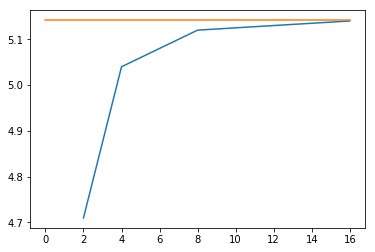

In [9]:
plt.plot(xres,yres)
plt.plot([0,16],[result,result])
plt.show()

I change the array of the previous plot to the presentage of error

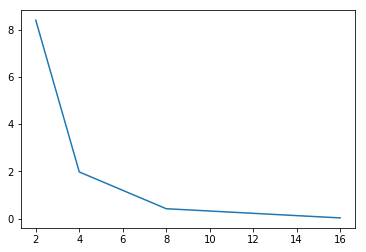

In [10]:
for i in range(len(yres)):
    yres[i] = (result-yres[i])/result *100
plt.plot(xres,yres)
plt.show()

## 3. Numerical Difference Calculation
Compose f'(x), f''(x), f'''(x) of $f(x) = \sin{x}$ for $x = 0,\cdots,2\pi$

In [11]:
fStr = lambda x:np.sin(x)

### The central difference equation within the step of

1st Differential
$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h}
$$

2nd Differential
$$
f''(x) = \frac{f(x+h)-2f(x)+f(x-h)}{h^2}
$$

3nd Differential
$$
f'''(x) = \frac{f(x+2h)-2f(x+h)+2f(x-h)-f(x-2h)}{2h^3}
$$

4nd Differential
$$
f''''(x) = \frac{f(x+2h)-4f(x+h)+6f(x)-4f(x-h)+f(x-2h)}{h^4}
$$

Create those differential into function

In [12]:
f1 = lambda x: (fStr(x+0.5)-fStr(x-0.5))/(2*0.5)
f2 = lambda x: (fStr(x+0.5) - 2*fStr(x) +fStr(x-0.5))/(0.5**2)
f3 = lambda x: (fStr(x+2*0.5)-2*fStr(x+0.5)+2*fStr(x-0.5)-fStr(x-2*0.5))/(2*0.5**3)

Create a X for ploting

In [13]:
xOri = np.linspace(0,2*np.pi,50)

Create Y point for ploting (Central Difference)

In [14]:
y1Cd = f1(xOri)
y2Cd = f2(xOri)
y3Cd = f3(xOri)

### The backward difference equation within the step of

1st Differential
$$
f'(x) = \frac{f(x)-f(x-h)}{h}
$$

2nd Differential
$$
f''(x) = \frac{f(x)-2f(x-h)+f(x-2h)}{h^2}
$$

3nd Differential
$$
f'''(x) = \frac{f(x)-3f(x-h)+3f(x-2h)-f(x-3h)}{h^3}
$$

4nd Differential
$$
f''''(x) = \frac{f(x)-4f(x-h)+6f(x-2h)-4f(x-3h)+f(x-4h)}{h^4}
$$

Create those differential into function

In [15]:
f1Bd = lambda x: (fStr(x)-fStr(x-0.5))/0.5
f2Bd = lambda x: (fStr(x)-2*fStr(x-0.5)+fStr(x-2*0.5))/0.5**2
f3Bd = lambda x: (fStr(x)-3*fStr(x-0.5)+3*fStr(x-2*0.5)-fStr(x-3*0.5))/0.5**3

Create Y for ploting (backward difference)

In [16]:
y1Bd = f1Bd(xOri)
y2Bd = f2Bd(xOri)
y3Bd = f3Bd(xOri)

### The forward difference equation within the step of

1st Differential
$$
f'(x) = \frac{f(x+h)-f(x)}{h}
$$

2nd Differential
$$
f''(x) = \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}
$$

3nd Differential
$$
f'''(x) = \frac{f(x+3h)-3f(x+2h)+3f(x+h)-f(x)}{h^3}
$$

4nd Differential
$$
f''''(x) = \frac{f(x+4h)-4f(x+3h)+6f(x+2h)-4f(x+h)+f(x)}{h^4}
$$

Create those differential into function

In [17]:
f1Fd = lambda x: (fStr(x+0.5)-fStr(x))/0.5
f2Fd = lambda x: (fStr(x+2*0.5)-2*fStr(x+0.5)+fStr(x))/0.5**2
f3Fd = lambda x: (fStr(x+3*0.5)-3*fStr(x+2*0.5)+3*fStr(x+0.5)-fStr(x))/0.5**3

Create Y for ploting (forward difference)

In [18]:
y1Fd = f1Fd(xOri)
y2Fd = f2Fd(xOri)
y3Fd = f3Fd(xOri)

The first differential, re-create the original & numerical differential base

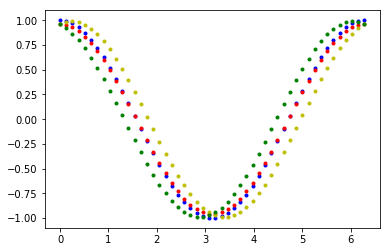

In [19]:
f1Ori = lambda x: np.cos(x)
y1Ori = f1Ori(xOri)
#Plot the real differential
plt.plot(xOri,y1Ori,".b")
#Plot the central differential
plt.plot(xOri,y1Cd,".r")
#Plot the backward differential
plt.plot(xOri,y1Bd,".y")
#Plot the forward differential
plt.plot(xOri,y1Fd,".g")
plt.show()

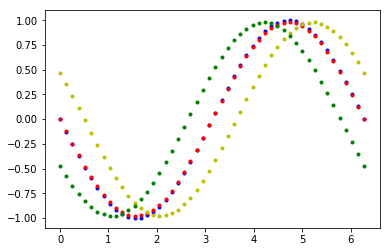

In [20]:
f2Ori = lambda x: -np.sin(x)
y2Ori = f2Ori(xOri)
#Plot the real differential
plt.plot(xOri,y2Ori,".b")
#Plot the central differential
plt.plot(xOri,y2Cd,".r")
#Plot the backward differential
plt.plot(xOri,y2Bd,".y")
#Plot the forward differential
plt.plot(xOri,y2Fd,".g")
plt.show()

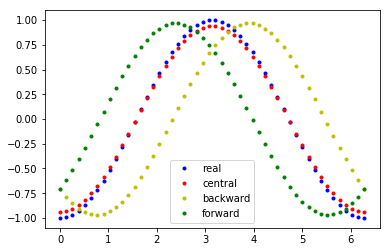

In [21]:
f3Ori = lambda x: -np.cos(x)
y3Ori = f3Ori(xOri)
#Plot the real differential
plt.plot(xOri,y3Ori,".b",label='real')
#Plot the central differential
plt.plot(xOri,y3Cd,".r",label='central')
#Plot the backward differential
plt.plot(xOri,y3Bd,".y",label="backward")
#Plot the forward differential
plt.plot(xOri,y3Fd,".g",label="forward")
plt.legend()
plt.show()